In [1]:
from pinball_crps import *

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.utils.fixes import parse_version, sp_version
# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"
from sklearn.linear_model import QuantileRegressor


rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5, size=x.shape[0])

In [2]:
np.linspace(start=0, stop=10, num=100)+ rng.normal(loc=0, scale=0.5, size=x.shape[0])

array([-0.70768537, -0.10931256,  0.03066294, -0.09810833,  0.32339755,
        0.70707593,  1.54915356,  0.79435961,  0.936856  ,  0.87186795,
        0.0507154 ,  1.09785417,  1.24223632,  2.54475237,  1.31796093,
        1.66592519,  1.59880573,  1.1328327 ,  2.38959323,  2.29515844,
        2.41571799,  1.66651839,  2.92361938,  1.62230679,  2.71767097,
        3.62048034,  2.13099446,  2.44412386,  2.87810851,  2.6775551 ,
        2.25497131,  3.16559462,  2.70117138,  3.57012955,  2.97463132,
        4.31032074,  3.24473699,  3.57634298,  4.24514245,  3.32396178,
        4.15413401,  4.79498552,  3.43868263,  4.43575127,  4.57438584,
        4.93636598,  4.02798929,  4.08724644,  5.10945563,  5.09798729,
        5.17575148,  5.32473926,  4.91251289,  5.4696622 ,  5.60108169,
        5.19837985,  6.58945291,  5.99449222,  5.26293411,  6.28787276,
        5.57326523,  6.55515846,  6.84192405,  5.9532952 ,  6.94633453,
        6.77204703,  7.07769675,  7.71607326,  6.74599281,  6.59

In [3]:
# threshold_z = 2
# z=np.abs(stats.zscore(y_normal))

# outlier_indices = np.where(z > threshold_z)[0]
# y_normal2=np.delete(y_normal, outlier_indices)
# x2=np.delete(x, outlier_indices)



Text(0.5, 0, 'x')

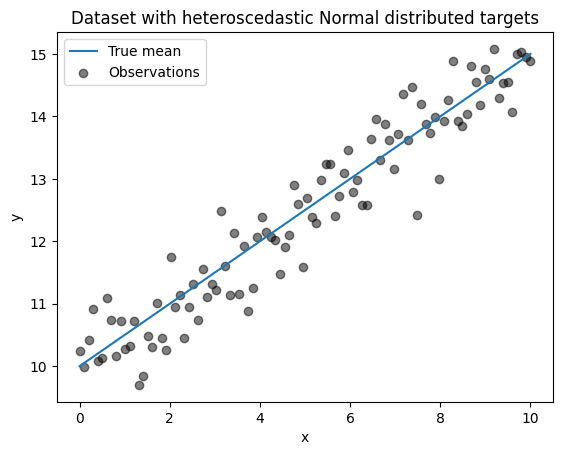

In [4]:

plt.plot(x, y_true_mean, label="True mean")
plt.scatter(x, y_normal, color="black", alpha=0.5, label="Observations")


plt.title("Dataset with heteroscedastic Normal distributed targets")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")


In [5]:

quantiles = [i/100 for i in range(1,100)]
# quantiles = [0.01, 0.5, 0.90]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

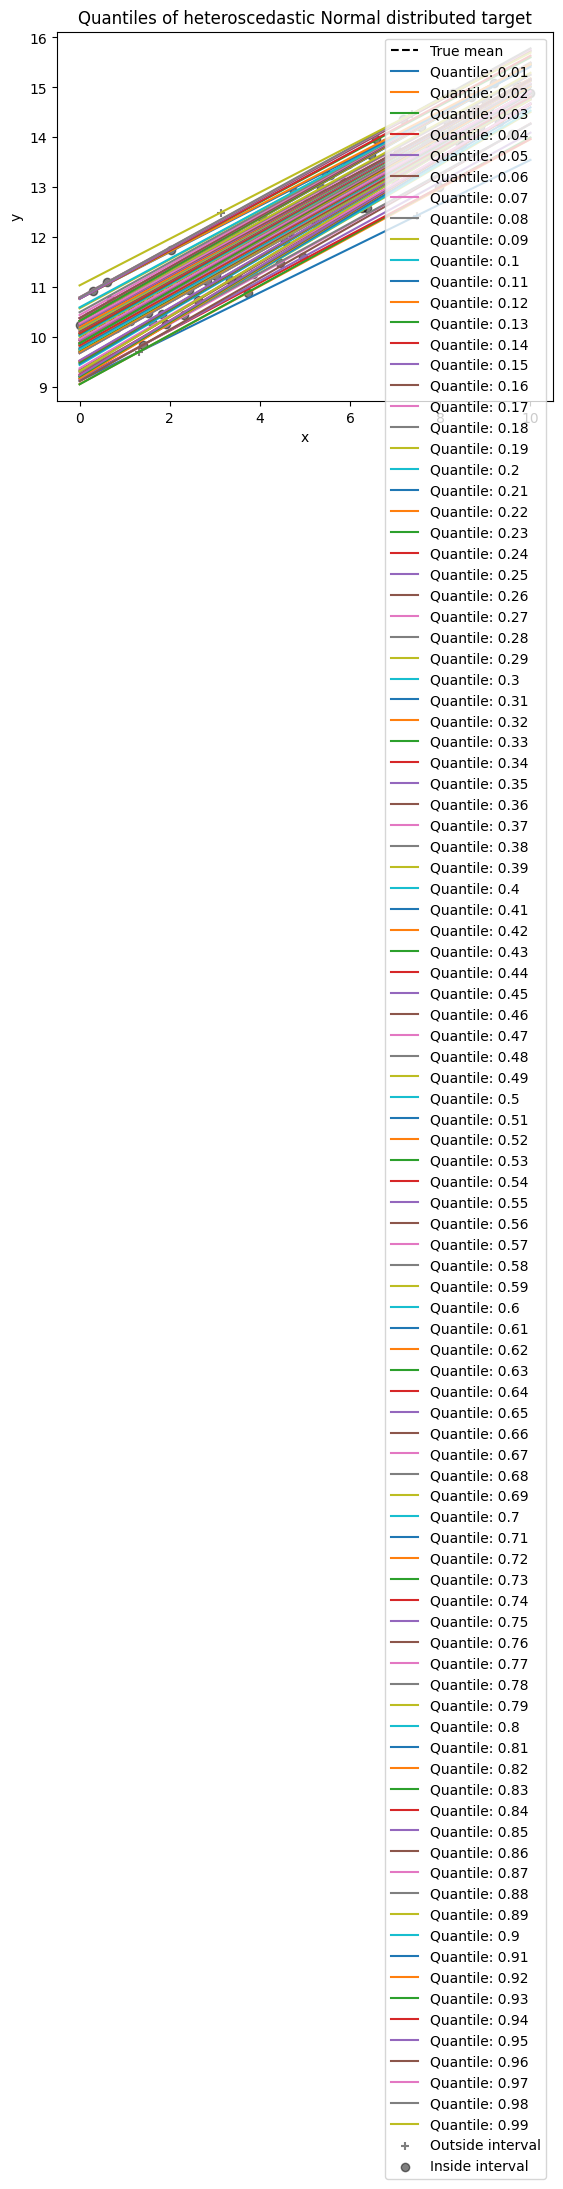

In [6]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

In [7]:
np.mean(predictions[0.01])


11.331999489398429

In [8]:
aaa=np.sort(x_sample_kme)

NameError: name 'x_sample_kme' is not defined

In [9]:
len(predictions[0.99])

100

In [10]:
for k in predictions.keys():
    predictions[k]=np.repeat(aaa[int(k*100)], 100)

NameError: name 'aaa' is not defined

In [11]:
CRPS=0
    # for every t in test
for t in range(len(predictions)):
    # for every tau in [0.01, ..., 0.99]
    for tau in range(1,100):
        # discrete approximation of CPRS
        CRPS+=mean_pinball_loss([y_normal[t]], [predictions[tau/100][t]], alpha=tau/100)
        

CRPS/=y_normal.size
CRPS

12.616244875881824

In [12]:
y_normal[19]

10.253444108928315

In [13]:
predictions[0.99][19]

11.926825698806846

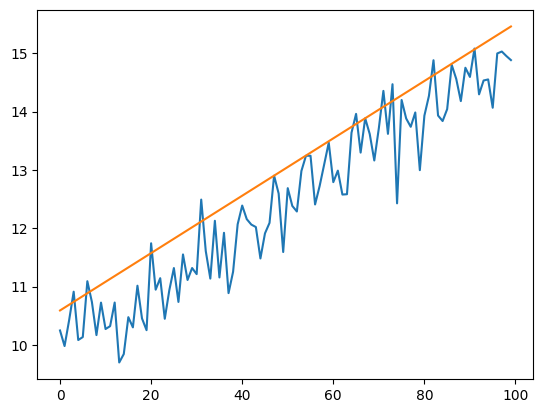

In [14]:
plt.plot(y_normal)
plt.plot(predictions[0.9])

In [15]:
y_normal[0]

10.248357076505616

In [16]:

np.sum([mean_pinball_loss([y_normal[i]], [predictions[0.91][i]], alpha=0.1) for i in range(100)])/100

0.5921887851985277

In [17]:
from sklearn.metrics import mean_pinball_loss
mean_pinball_loss([3], [1], alpha=0.1)


0.2

In [18]:
from scipy.stats import norm

In [19]:
y_normal[99]

14.882706433312427

In [20]:
predictions[0.01][98]

13.500645703791339

In [21]:
norm.fit(preda)

NameError: name 'preda' is not defined

In [22]:
%load_ext autoreload
%autoreload 2

import FMCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import sys
import os

from src.kde import *
from src.cdf import *
from src.pinball_crps import *
from src.miscellaneous import *

In [23]:
xtrain_n=y_normal.reshape(1,100)

Kernel=Kde("Exponential", 0.1)
Kernel.Kme(xtrain_n)

In [24]:
Kernel.Kme(xtrain_n)

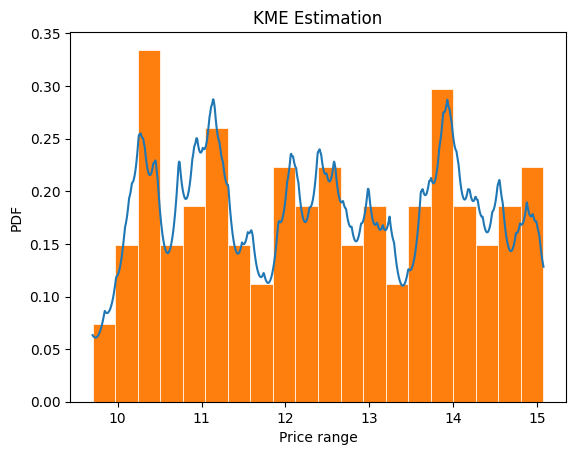

In [25]:
Kernel.PlotKde(nbin=20)

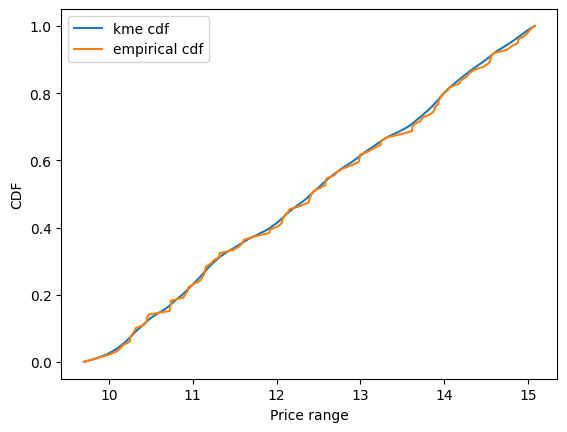

In [26]:
plt.plot(Kernel.x_axis, np.cumsum(Kernel.y_axis)/np.sum(Kernel.y_axis), label="kme cdf")
plt.plot(np.sort(xtrain_n.reshape(100,)), cdf_funct(np.sort(xtrain_n.reshape(100,))), label="empirical cdf");

plt.xlabel("Price range")
plt.ylabel("CDF")
plt.legend()

In [27]:
xcdf=Kernel.x_axis
ycdf=(np.cumsum(Kernel.y_axis)/np.sum(Kernel.y_axis))

xpdf=Kernel.x_axis
ypdf=Kernel.y_axis

Text(0.5, 1.0, 'Inverse Cdf')

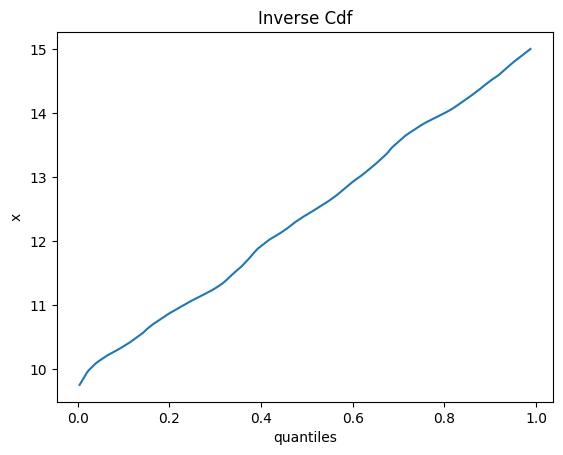

In [28]:
np.random.seed(10)
unif=np.random.uniform(0,1,xtrain_n.size)

x_sample_kme=[phi_inv(i, xpdf,ypdf, xcdf, ycdf) for i in unif]

s_unif=np.sort(unif)
plt.plot(s_unif, [phi_inv(i, xpdf,ypdf, xcdf, ycdf) for i in s_unif])
plt.xlabel("quantiles")
plt.ylabel("x")
plt.title("Inverse Cdf")

In [29]:
%load_ext autoreload
%autoreload 2
from src.pinball_crps import *

CRPS(x_sample_kme, xtrain_n.reshape(100,))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: only integer scalar arrays can be converted to a scalar index

(array([0.04627129, 0.13881388, 0.04627129, 0.13881388, 0.41644163,
        1.29559619, 0.74034068, 0.83288326, 0.6015268 , 0.32389905]),
 array([13.14293086, 13.36123058, 13.5795303 , 13.79783002, 14.01612974,
        14.23442946, 14.45272917, 14.67102889, 14.88932861, 15.10762833,
        15.32592805]),
 <BarContainer object of 10 artists>)

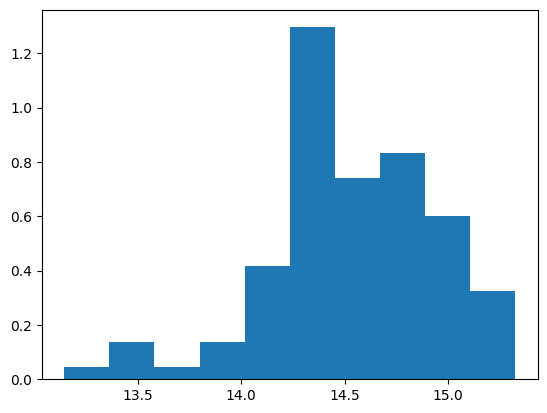

In [30]:
pred_t10=[predictions[k][90] for k in predictions.keys()]
plt.hist(pred_t10, density=True, bins=10)